In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import zipfile
import os

with zipfile.ZipFile('/content/drive/MyDrive/data.zip', 'r') as zip_ref:
    zip_ref.extractall('')
# with zipfile.ZipFile('/content/drive/MyDrive/sardin.zip', 'r') as zip_ref:
#     zip_ref.extractall('')
# with zipfile.ZipFile('/content/drive/MyDrive/chandana.zip', 'r') as zip_ref:
#     zip_ref.extractall('')

**Importing the Dependencies**

In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [35]:
Ilish_pic= os.listdir('ilish')
print(Ilish_pic[0:5])
print(Ilish_pic[-5:])

print()

['6373.webp', '5810.webp', '1162.webp', '3737.webp', '5992.webp']
['3880.webp', '8808.webp', '131.webp', '8749.webp', '4243.webp']



In [36]:
Sardin_pic= os.listdir('sardin')

In [37]:
Chandana_pic= os.listdir('chandana')

In [38]:
print('Ilish images:', len(Ilish_pic))
print('Sardin images:', len(Sardin_pic))
print('Chandana images:', len(Chandana_pic))

Ilish images: 10000
Sardin images: 10000
Chandana images: 10000


**Creating Labels for the two class of Images**

Ilish  -->   0

Sardin  -->  1

Chandana --> 2

In [39]:
# create the labels

Ilish_labels = [0]*10000

Sardin_labels = [1]*10000

Chandana_labels = [2]*10000

In [40]:
print(Ilish_labels[0:5])

print(Sardin_labels[0:5])

print(Chandana_labels[0:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[2, 2, 2, 2, 2]


In [41]:
print(len(Ilish_labels))
print(len(Sardin_labels))
print(len(Chandana_labels))

10000
10000
10000


In [42]:
labels = Ilish_labels + Sardin_labels + Chandana_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

30000
[0, 0, 0, 0, 0]
[2, 2, 2, 2, 2]


**Displaying the Images**

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [43]:
import numpy as np
import random
from PIL import Image

# Parameters
image_number = 10000  # Number of images to select from each type

# Initialize the list to store the images
data = []

# Process ilish images
ilish_path = 'ilish/'
Ilish_pic = sorted(os.listdir(ilish_path))  # Make sure the images are in order
random.shuffle(Ilish_pic)  # Shuffle images to get random ones
for img_file in Ilish_pic[:image_number]:
    image = Image.open(ilish_path + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Process sardin images
sardin_path = 'sardin/'
Sardin_pic = sorted(os.listdir(sardin_path))  # Make sure the images are in order
random.shuffle(Sardin_pic)  # Shuffle images to get random ones
for img_file in Sardin_pic[:image_number]:
    image = Image.open(sardin_path + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Process chandana images
chandana_path = 'chandana/'
Chandana_pic = sorted(os.listdir(chandana_path))  # Make sure the images are in order
random.shuffle(Chandana_pic)  # Shuffle images to get random ones
for img_file in Chandana_pic[:image_number]:
    image = Image.open(chandana_path + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Now, `data` contains 4000 random images from each type, for a total of 12,000 images.

In [44]:
# Convert labels to numpy array for easy processing
labels = np.array(labels)

# Count the number of images in each class
unique, counts = np.unique(labels, return_counts=True)

# Print the number of images for each class
class_counts = dict(zip(unique, counts))
print(f"Class counts: {class_counts}")

Class counts: {0: 10000, 1: 10000, 2: 10000}


array([[[159, 156, 151],
        [164, 161, 156],
        [153, 151, 146],
        ...,
        [158, 162, 161],
        [155, 157, 154],
        [140, 142, 139]],

       [[161, 158, 153],
        [150, 147, 142],
        [153, 150, 145],
        ...,
        [163, 167, 166],
        [166, 168, 165],
        [164, 165, 162]],

       [[150, 147, 140],
        [153, 151, 146],
        [150, 149, 144],
        ...,
        [167, 169, 168],
        [153, 155, 151],
        [152, 152, 148]],

       ...,

       [[183, 185, 182],
        [188, 190, 187],
        [194, 194, 192],
        ...,
        [114, 113, 108],
        [116, 116, 110],
        [109, 108, 104]],

       [[180, 182, 179],
        [181, 182, 179],
        [185, 185, 183],
        ...,
        [125, 127, 122],
        [110, 111, 106],
        [121, 121, 116]],

       [[174, 176, 173],
        [178, 180, 177],
        [177, 177, 175],
        ...,
        [117, 119, 116],
        [125, 125, 123],
        [126, 124, 120]]], dtype=uint8)
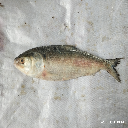

In [45]:
data[50]

In [46]:
type(data)

list

In [47]:
len(data)

30000

array([[[182, 184, 171],
        [183, 185, 174],
        [187, 188, 180],
        ...,
        [178, 178, 169],
        [175, 175, 167],
        [175, 177, 166]],

       [[171, 174, 167],
        [183, 186, 179],
        [193, 196, 189],
        ...,
        [169, 170, 162],
        [176, 177, 169],
        [180, 182, 173]],

       [[192, 194, 188],
        [191, 197, 190],
        [208, 213, 207],
        ...,
        [173, 174, 166],
        [177, 178, 169],
        [161, 163, 152]],

       ...,

       [[152, 152, 144],
        [149, 150, 142],
        [157, 158, 152],
        ...,
        [139, 140, 133],
        [136, 137, 131],
        [140, 141, 136]],

       [[162, 164, 159],
        [156, 157, 151],
        [158, 159, 153],
        ...,
        [138, 138, 130],
        [144, 145, 137],
        [144, 144, 137]],

       [[156, 157, 152],
        [156, 157, 151],
        [156, 159, 152],
        ...,
        [138, 141, 131],
        [141, 144, 134],
        [136, 138, 130]]], dtype=uint8)
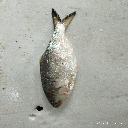

In [48]:
data[0]

In [49]:
type(data[0])

numpy.ndarray

In [50]:
data[0].shape

(128, 128, 3)

In [51]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [52]:
type(X)

numpy.ndarray

In [53]:
type(Y)

numpy.ndarray

In [54]:
print(X.shape)
print(Y.shape)

(30000, 128, 128, 3)
(30000,)


In [55]:
print(Y)

[0 0 0 ... 2 2 2]


**Train Test Split**

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [57]:
print(X.shape, X_train.shape, X_test.shape)

(30000, 128, 128, 3) (24000, 128, 128, 3) (6000, 128, 128, 3)


In [58]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[215, 216, 221],
        [215, 216, 221],
        [215, 216, 222],
        ...,
        [205, 208, 212],
        [203, 205, 210],
        [203, 204, 209]],

       [[214, 215, 221],
        [214, 215, 220],
        [215, 216, 221],
        ...,
        [204, 205, 210],
        [200, 201, 206],
        [198, 199, 204]],

       [[215, 215, 221],
        [214, 215, 221],
        [215, 216, 221],
        ...,
        [203, 204, 209],
        [202, 203, 208],
        [199, 202, 207]],

       ...,

       [[186, 187, 192],
        [185, 186, 191],
        [185, 186, 191],
        ...,
        [179, 181, 187],
        [181, 183, 189],
        [180, 182, 189]],

       [[186, 187, 193],
        [186, 187, 192],
        [186, 187, 192],
        ...,
        [179, 181, 187],
        [180, 181, 187],
        [179, 180, 187]],

       [[188, 189, 194],
        [188, 189, 194],
        [187, 188, 193],
        ...,
        [178, 180, 185],
        [178, 180, 185],
        [177, 178, 185]]], dtype=uint8)
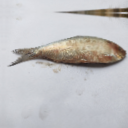

In [59]:
X_train[0]

In [60]:
X_train_scaled[0]

array([[[0.84313725, 0.84705882, 0.86666667],
        [0.84313725, 0.84705882, 0.86666667],
        [0.84313725, 0.84705882, 0.87058824],
        ...,
        [0.80392157, 0.81568627, 0.83137255],
        [0.79607843, 0.80392157, 0.82352941],
        [0.79607843, 0.8       , 0.81960784]],

       [[0.83921569, 0.84313725, 0.86666667],
        [0.83921569, 0.84313725, 0.8627451 ],
        [0.84313725, 0.84705882, 0.86666667],
        ...,
        [0.8       , 0.80392157, 0.82352941],
        [0.78431373, 0.78823529, 0.80784314],
        [0.77647059, 0.78039216, 0.8       ]],

       [[0.84313725, 0.84313725, 0.86666667],
        [0.83921569, 0.84313725, 0.86666667],
        [0.84313725, 0.84705882, 0.86666667],
        ...,
        [0.79607843, 0.8       , 0.81960784],
        [0.79215686, 0.79607843, 0.81568627],
        [0.78039216, 0.79215686, 0.81176471]],

       ...,

       [[0.72941176, 0.73333333, 0.75294118],
        [0.7254902 , 0.72941176, 0.74901961],
        [0.7254902 , 0

In [61]:
gfgdf

NameError: name 'gfgdf' is not defined

#Base CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras

###Optuna Hyper-parameter Tuing
###Start

In [ ]:
# import keras
# from keras import layers, models
# import optuna
# from sklearn.model_selection import train_test_split

# # Define the model creation function
# def create_model(learning_rate, num_filters, kernel_size, input_shape, num_of_classes):
#     model = models.Sequential()

#     model.add(layers.Conv2D(num_filters, kernel_size, activation='relu', input_shape=input_shape))
#     model.add(layers.MaxPooling2D())

#     model.add(layers.Conv2D(num_filters * 2, kernel_size, activation='relu'))
#     model.add(layers.MaxPooling2D())

#     model.add(layers.Flatten())

#     model.add(layers.Dense(64, activation='relu'))
#     model.add(layers.Dropout(0.5))

#     model.add(layers.Dense(32, activation='relu'))
#     model.add(layers.Dropout(0.5))

#     model.add(layers.Dense(num_of_classes, activation='softmax'))

#     model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])

#     return model









# # Objective function for Optuna
# def objective(trial):
#     # Define hyperparameters to tune
#     learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
#     num_filters = trial.suggest_int('num_filters', 16, 128)
#     kernel_size = trial.suggest_categorical('kernel_size', [(3, 3), (5, 5), (7, 7)])

#     # Create the model
#     model = create_model(
#         learning_rate=learning_rate,
#         num_filters=num_filters,
#         kernel_size=kernel_size,
#         input_shape=(256, 256, 3),  # Change if your input shape differs
#         num_of_classes=3            # Number of classes
#     )

#     # Split training data into training and validation subsets
#     X_train_fold, X_val_fold, Y_train_fold, Y_val_fold = train_test_split(
#         X_train_scaled, Y_train, test_size=0.2, random_state=42)

#     # Train the model
#     model.fit(X_train_fold, Y_train_fold,
#               epochs=5,  # Use fewer epochs for faster Optuna optimization
#               batch_size=32,
#               validation_data=(X_val_fold, Y_val_fold),
#               verbose=0)

#     # Evaluate the model on the validation set
#     loss, accuracy = model.evaluate(X_val_fold, Y_val_fold, verbose=0)
#     return accuracy  # Return validation accuracy as the objective metric







# # Run the Optuna study
# study = optuna.create_study(direction='maximize')  # Maximize validation accuracy
# study.optimize(objective, n_trials=20)  # Number of trials

# # Print the best trial
# print("\nBest Trial:")
# print(f"  Value: {study.best_value}")
# print(f"  Params: {study.best_params}")







# # Train the final model using the best hyperparameters
# best_params = study.best_params
# final_model = create_model(
#     learning_rate=best_params['learning_rate'],
#     num_filters=best_params['num_filters'],
#     kernel_size=best_params['kernel_size'],
#     input_shape=(256, 256, 3),
#     num_of_classes=3
# )

# # Train on the full training data
# final_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1)

# # Evaluate on the test set
# loss, accuracy = final_model.evaluate(X_test_scaled, Y_test)
# print(f"\nTest Accuracy: {accuracy:.4f}")


###End

In [ ]:
import keras
from keras import layers

num_of_classes = 3

model = keras.Sequential()

model.add(keras.layers.Conv2D(57, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D())  #pool_size=(2,2)


model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D())


model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
# compile the neural network
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0000002568689),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


In [ ]:
# !pip install --upgrade tensorflow

In [ ]:
# import tensorflow as tf
# print(tf.__version__)


In [ ]:
# import tensorflow as tf

# # Assuming `X_train_scaled` and `Y_train` are NumPy arrays
# train_dataset_size = int(0.9 * len(X_train_scaled))  # 90% for training
# val_dataset_size = len(X_train_scaled) - train_dataset_size  # 10% for validation

# # Convert to tf.data.Dataset
# dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, Y_train))

# # Shuffle and split into training and validation datasets
# train_dataset = dataset.take(train_dataset_size).shuffle(buffer_size=1000).batch(32).prefetch(tf.data.AUTOTUNE)
# val_dataset = dataset.skip(train_dataset_size).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# # Train the model
# history = model.fit(
#     train_dataset,
#     validation_data=val_dataset,
#     epochs=20
# )

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=20)

In [ ]:
loss, accuracy = model.evaluate(X_train_scaled, Y_train)
print('Train Accuracy =', accuracy)

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)

print('Test Accuracy =', accuracy)

In [ ]:
y_pred=model.predict(X_test_scaled)

y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred_classes)

In [ ]:
from sklearn.metrics import accuracy_score

# Example for classification predictions
accuracy = accuracy_score(Y_test, y_pred_classes)  # y_pred_classes should be class labels
print(f"Accuracy Score: {accuracy}")


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred_classes)
print (f"R² Score: {r2}")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions and convert to class labels
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_classes)

# Print the confusion matrix (optional)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
import pandas as pd

# Assuming y_pred_classes is the predicted labels and Y_test is the true labels
# Compute precision, recall, and F1 score
precision = precision_score(Y_test, y_pred_classes, average='weighted')
recall = recall_score(Y_test, y_pred_classes, average='weighted')
f1 = f1_score(Y_test, y_pred_classes, average='weighted')

# Print metrics
print("\nClassification Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification report for detailed metrics per class
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred_classes)

# Plot Confusion Matrix using Seaborn Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'], cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Precision, Recall, and F1 Score for each class
# Let's assume your model has 3 classes
metrics = {'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# You can create a barplot to visualize precision, recall, and F1 score for each class
metrics_data = {
    'Metric': ['Precision', 'Recall', 'F1 Score'],
    'Score': [precision, recall, f1]
}

# Create the seaborn barplot
metrics_df = pd.DataFrame(metrics_data)
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')
plt.title('Classification Metrics (Weighted)')
plt.show()


In [ ]:
h = history


plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

#With K-Fold [Cross Validation]

In [ ]:
import keras
from keras import layers, models
from sklearn.model_selection import train_test_split

# Define the model creation function
def create_model(learning_rate, num_filters, kernel_size, input_shape, num_of_classes):
    model = models.Sequential()

    model.add(layers.Conv2D(num_filters, kernel_size, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D())

    model.add(layers.Conv2D(num_filters * 2, kernel_size, activation='relu'))
    model.add(layers.MaxPooling2D())

    model.add(layers.Flatten())

    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(num_of_classes, activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold

# K-Fold Cross-Validation setup
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
scores = []
history_list = []  # To store history objects for each fold

# Initialize lists to store fold-wise results
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

for train_index, val_index in kfold.split(X_train_scaled, Y_train):
    print(f"\nTraining Fold {fold_no}...")

    # Split data into training and validation for this fold
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[val_index]

    # Create the model
    model = create_model(
        learning_rate=0.00025686890659545365,
        num_filters=87,
        kernel_size=(3, 3),
        input_shape=(128, 128, 3),
        num_of_classes=3
    )

    # Train the model
    history = model.fit(
        X_train_fold, Y_train_fold,
        validation_data=(X_val_fold, Y_val_fold),
        epochs=10,
        batch_size=32,
        verbose=1
    )

    # Store the training and validation metrics for each fold
    train_accuracies.append(history.history['accuracy'])
    val_accuracies.append(history.history['val_accuracy'])
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])

    # Evaluate the model
    loss, accuracy = model.evaluate(X_val_fold, Y_val_fold, verbose=0)
    print(f"Fold {fold_no} - Loss: {loss}, Accuracy: {accuracy}")

    scores.append(accuracy)
    fold_no += 1

# Print average accuracy across folds
print(f"\nAverage Validation Accuracy: {np.mean(scores)}")

In [ ]:
# Plotting the training and validation accuracy for each fold
plt.figure(figsize=(12, 6))
for i in range(len(train_accuracies)):
    plt.plot(range(1, 11), train_accuracies[i], label=f'Train Accuracy Fold {i+1}')
    plt.plot(range(1, 11), val_accuracies[i], label=f'Val Accuracy Fold {i+1}', linestyle='--')

plt.title('Training and Validation Accuracy for Each Fold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting the training and validation loss for each fold
plt.figure(figsize=(12, 6))
for i in range(len(train_losses)):
    plt.plot(range(1, 11), train_losses[i], label=f'Train Loss Fold {i+1}')
    plt.plot(range(1, 11), val_losses[i], label=f'Val Loss Fold {i+1}', linestyle='--')

plt.title('Training and Validation Loss for Each Fold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Final evaluation on the test set
final_model = create_model(
    learning_rate=0.00025686890659545365,
    num_filters=87,
    kernel_size=(3, 3),
    input_shape=(128, 128, 3),
    num_of_classes=3
)

# Train the final model on the full training set
final_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1)

**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_train_scaled, Y_train)
print('Train Accuracy =', accuracy)

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)

print('Test Accuracy =', accuracy)

In [ ]:
y_pred=model.predict(X_test_scaled)

y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred_classes)

In [ ]:
from sklearn.metrics import accuracy_score

# Example for classification predictions
accuracy = accuracy_score(Y_test, y_pred_classes)  # y_pred_classes should be class labels
print(f"Accuracy Score: {accuracy}")


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred_classes)
print (f"R² Score: {r2}")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions and convert to class labels
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_classes)

# Print the confusion matrix (optional)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions and convert to class labels
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [ ]:

# Compute precision, recall, and F1 score
precision = precision_score(Y_test, y_pred_classes, average='weighted')
recall = recall_score(Y_test, y_pred_classes, average='weighted')
f1 = f1_score(Y_test, y_pred_classes, average='weighted')

# Print metrics
print("\nClassification Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification report for detailed metrics per class
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_classes))

In [ ]:
h = history


plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
# After training the model
model.save('cnn_with_k-fold_model.h5')
print("Model saved successfully!")


In [ ]:
#import pickle

#with open('fish_model.pkl', 'wb') as file:
 #   pickle.dump(model, file)

In [ ]:

# model.save('CNN_model.keras')


In [ ]:
# # from keras.models import load_model

# model = load_model('fish_model.h5')
# print("Model loaded successfully!")


In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# # Specify the directory path
# base_path = 'ilish/'

# # Get the image file name from user input
# image_file_name = input('Enter the name of the image file (with extension): ')

# # Combine the base path with the user input to get the full path
# input_image_path = base_path + image_file_name

# # Debug: Print the full image path
# print(f"Trying to load image from: {input_image_path}")

# # Load the image
# input_image = cv2.imread(input_image_path)

# # Check if the image was loaded successfully
# if input_image is None:
#     print(f"Error: Unable to load image at {input_image_path}. Please check the file name and path.")
# else:
#     # Convert image from BGR to RGB for displaying with matplotlib
#     input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

#     # Display the image using matplotlib
#     plt.imshow(input_image_rgb)
#     plt.axis('off')  # Hide axis
#     plt.show()

#     # Resize the image and preprocess for prediction
#     input_image_resized = cv2.resize(input_image, (256, 256))
#     input_image_scaled = input_image_resized / 255.0
#     input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

#     # Make a prediction
#     input_prediction = model.predict(input_image_reshaped)
#     print(input_prediction)

#     # Get the predicted class label
#     input_pred_label = np.argmax(input_prediction)
#     print(input_pred_label)

#     # Display the result based on the predicted label
#     if input_pred_label == 0:
#         print('The Fish is Ilish')
#     elif input_pred_label == 1:
#         print('The Fish is Sardin')
#     else:
#         print('The Fish is Chandina')

###RMS Prop Optimizer

In [ ]:
from sklearn.model_selection import KFold
import keras
from keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Define the model creation function
def create_model(learning_rate, num_filters, kernel_size, input_shape, num_of_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(num_filters, kernel_size, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D())
    model.add(layers.Conv2D(num_filters * 2, kernel_size, activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_of_classes, activation='softmax'))

    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Normalize data (if not already normalized)
# X_train_scaled = X_train / 255.0
# X_test_scaled = X_test / 255.0

# Parameters
learning_rate = 0.00025686890659545365
num_filters = 87
kernel_size = (3, 3)
input_shape = (128, 128, 3)
num_of_classes = 3

# K-Fold Cross-Validation setup
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
scores = []

for train_index, val_index in kfold.split(X_train_scaled, Y_train):
    print(f"\nTraining Fold {fold_no}...")

    # Split data into training and validation for this fold
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[val_index]

    # Create the model
    model = create_model(
        learning_rate=learning_rate,
        num_filters=num_filters,
        kernel_size=kernel_size,
        input_shape=input_shape,
        num_of_classes=num_of_classes
    )

    # Train the model
    history = model.fit(
        X_train_fold, Y_train_fold,
        validation_data=(X_val_fold, Y_val_fold),
        epochs=10,
        batch_size=32,
        verbose=1
    )

    # Evaluate the model
    loss, accuracy = model.evaluate(X_val_fold, Y_val_fold, verbose=0)
    print(f"Fold {fold_no} - Loss: {loss}, Accuracy: {accuracy}")

    scores.append(accuracy)
    fold_no += 1

# Print average accuracy across folds
print(f"\nAverage Validation Accuracy: {np.mean(scores):.4f}")


In [ ]:
# Plotting the training and validation accuracy for each fold
plt.figure(figsize=(12, 6))
for i in range(len(train_accuracies)):
    plt.plot(range(1, 11), train_accuracies[i], label=f'Train Accuracy Fold {i+1}')
    plt.plot(range(1, 11), val_accuracies[i], label=f'Val Accuracy Fold {i+1}', linestyle='--')

plt.title('Training and Validation Accuracy for Each Fold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting the training and validation loss for each fold
plt.figure(figsize=(12, 6))
for i in range(len(train_losses)):
    plt.plot(range(1, 11), train_losses[i], label=f'Train Loss Fold {i+1}')
    plt.plot(range(1, 11), val_losses[i], label=f'Val Loss Fold {i+1}', linestyle='--')

plt.title('Training and Validation Loss for Each Fold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Final evaluation on the test set
final_model = create_model(
    learning_rate=learning_rate,
    num_filters=num_filters,
    kernel_size=kernel_size,
    input_shape=input_shape,
    num_of_classes=num_of_classes
)

In [ ]:
# Train the final model on the full training set
history = final_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1)

In [ ]:
# loss, accuracy = final_model.evaluate(X_test_scaled, Y_test)
history = final_model.fit(X_train_scaled, Y_train, validation_split=0.2, epochs=10)

print('Test Accuracy =', accuracy)

In [ ]:
# Evaluate the model on the training and test sets
train_loss, train_accuracy = final_model.evaluate(X_train_scaled, Y_train, verbose=0)
val_loss, val_accuracy = final_model.evaluate(X_test_scaled, Y_test, verbose=0)

print(f'\nTrain Accuracy = {train_accuracy:.4f}')
print(f'Test Accuracy = {test_accuracy:.4f}')

In [ ]:
print(history.history.keys())

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


#RESNET50+RMS

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(128,128,3))
convolutional_base.summary()

In [ ]:
num_of_classes = 3

model = models.Sequential()


# model.add(layers.UpSampling2D((2,2)))
# model.add(layers.UpSampling2D((2,2)))
# model.add(layers.UpSampling2D((2,2)))


model.add(convolutional_base)


model.add(layers.Flatten())
model.add(layers.BatchNormalization())


model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())


model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())


model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())


model.add(layers.Dense(num_of_classes, activation='softmax'))

#####RMS Optimizer

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
# Now fit the model with resized images
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=20)

In [ ]:
loss, accuracy = model.evaluate(X_train_scaled, Y_train)
print('Train Accuracy =', accuracy)

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

In [ ]:
y_pred=model.predict(X_test_scaled)

y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred_classes)

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred_classes)
print(f"R² Score: {r2}")

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:

# Compute precision, recall, and F1 score
precision = precision_score(Y_test, y_pred_classes, average='weighted')
recall = recall_score(Y_test, y_pred_classes, average='weighted')
f1 = f1_score(Y_test, y_pred_classes, average='weighted')

# Print metrics
print("\nClassification Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification report for detailed metrics per class
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_classes))

In [ ]:
h = history


plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('resnet_model.h5')

#####Adam Optimizer + K-Fold

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, r2_score
import keras
from keras import layers, models
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the model creation function
def create_model(learning_rate, input_shape, num_of_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D())
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_of_classes, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Parameters
learning_rate = 2e-5
input_shape = (128, 128, 3)
num_of_classes = 3
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics
fold_no = 1
scores = []
histories = []

for train_index, val_index in kfold.split(X_train_scaled, Y_train):
    print(f"\nTraining Fold {fold_no}...")

    # Split data for this fold
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[val_index]

    # Create the model
    model = create_model(learning_rate, input_shape, num_of_classes)

    # Train the model
    history = model.fit(
        X_train_fold, Y_train_fold,
        validation_data=(X_val_fold, Y_val_fold),
        epochs=20,
        batch_size=32,
        verbose=1
    )
    histories.append(history)

    # Evaluate the model on validation set
    loss, accuracy = model.evaluate(X_val_fold, Y_val_fold, verbose=0)
    print(f"Fold {fold_no} - Validation Loss: {loss}, Validation Accuracy: {accuracy}")
    scores.append(accuracy)
    fold_no += 1

# Average accuracy across folds
print(f"\nAverage Validation Accuracy: {np.mean(scores):.4f}")

# Train final model on full training data
final_model = create_model(learning_rate, input_shape, num_of_classes)
final_history = final_model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=20, batch_size=32, verbose=1)

# Evaluate on the test set
test_loss, test_accuracy = final_model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Predictions
y_pred = final_model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
print("\nPredicted Classes:")
print(y_pred_classes)

# R² Score
r2 = r2_score(Y_test, y_pred_classes)
print(f"R² Score: {r2:.4f}")

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Precision, Recall, F1 Score
precision = precision_score(Y_test, y_pred_classes, average='weighted')
recall = recall_score(Y_test, y_pred_classes, average='weighted')
f1 = f1_score(Y_test, y_pred_classes, average='weighted')

print("\nClassification Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_classes))

# Plot training and validation loss/accuracy for the final model
h = final_history.history

plt.plot(h['loss'], label='Train Loss')
plt.plot(h['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(h['accuracy'], label='Train Accuracy')
plt.plot(h['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
loss, accuracy = model.evaluate(X_train_scaled, Y_train)
print('Train Accuracy =', accuracy)

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Train Accuracy =', accuracy)

###SGD+K-Fold

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, r2_score
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define the model creation function
def create_model(input_shape, num_classes, learning_rate, momentum):
    model = models.Sequential()

    # Add convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Flatten and fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Parameters
input_shape = (128, 128, 3)  # Adjust to your image dimensions
num_classes = 3
learning_rate = 0.01
momentum = 0.9
batch_size = 32
epochs = 10

# K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
scores = []

for train_index, val_index in kfold.split(X_train_scaled, Y_train):
    print(f"\nTraining Fold {fold_no}...")

    # Split data for the fold
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[val_index]

    # Create the model
    model = create_model(input_shape, num_classes, learning_rate, momentum)

    # Callbacks
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

    # Train the model
    history = model.fit(
        X_train_fold, Y_train_fold,
        validation_data=(X_val_fold, Y_val_fold),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[reduce_lr, early_stopping],
        verbose=1
    )

    # Evaluate the model
    val_loss, val_accuracy = model.evaluate(X_val_fold, Y_val_fold, verbose=0)
    print(f"Fold {fold_no} - Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")
    scores.append(val_accuracy)
    fold_no += 1

# Average validation accuracy across folds
print(f"\nAverage Validation Accuracy: {np.mean(scores):.4f}")

# Final training on the full dataset
final_model = create_model(input_shape, num_classes, learning_rate, momentum)
final_history = final_model.fit(
    X_train_scaled, Y_train,
    validation_split=0.1,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[reduce_lr, early_stopping],
    verbose=1
)

# Evaluate on the test set
test_loss, test_accuracy = final_model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Predictions
y_pred = final_model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# R² Score
r2 = r2_score(Y_test, y_pred_classes)
print(f"R² Score: {r2:.4f}")

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Precision, Recall, F1 Score
precision = precision_score(Y_test, y_pred_classes, average='weighted')
recall = recall_score(Y_test, y_pred_classes, average='weighted')
f1 = f1_score(Y_test, y_pred_classes, average='weighted')

print("\nClassification Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_classes))

# Plot training and validation loss/accuracy for the final model
h = final_history.history

plt.plot(h['loss'], label='Train Loss')
plt.plot(h['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(h['accuracy'], label='Train Accuracy')
plt.plot(h['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


#Cross-Validation Check
1. **Validation Set Approach**
2. **Leave-P-Out Cross-Validation**
3. **Leave-One-Out Cross-Validation**
4. **K-Fold Cross-Validation**
5. **Stratified K-Fold Cross-Validation**


###With K-Fold

In [ ]:
# from sklearn.model_selection import KFold
# from tensorflow.keras import models, layers
# from tensorflow.keras.optimizers import RMSprop
# from tensorflow.keras.applications import ResNet50
# import numpy as np

# # Parameters
# num_of_classes = 3
# k_folds = 5
# epochs = 20
# batch_size = 32

# # ResNet50 base model
# convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# # Initialize KFold
# kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# # Store fold results
# fold_no = 1
# accuracies = []

# for train_index, val_index in kf.split(X_train_scaled):
#     print(f"\nFold {fold_no} ------------------------")

#     # Split training data into train/validation for this fold
#     X_fold_train, X_fold_val = X_train_scaled[train_index], X_train_scaled[val_index]
#     Y_fold_train, Y_fold_val = Y_train[train_index], Y_train[val_index]

#     # Define the model
#     model = models.Sequential()
#     model.add(convolutional_base)
#     model.add(layers.Flatten())
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dense(32, activation='relu'))
#     model.add(layers.Dropout(0.5))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dense(64, activation='relu'))
#     model.add(layers.Dropout(0.5))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dense(128, activation='relu'))
#     model.add(layers.Dropout(0.5))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dense(num_of_classes, activation='softmax'))

#     # Compile the model
#     model.compile(optimizer=RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

#     # Train the model
#     history = model.fit(
#         X_fold_train, Y_fold_train,
#         validation_data=(X_fold_val, Y_fold_val),
#         epochs=epochs,
#         batch_size=batch_size,
#         verbose=1
#     )

#     # Evaluate the model
#     loss, accuracy = model.evaluate(X_fold_val, Y_fold_val)
#     print(f"Fold {fold_no} - Validation Accuracy: {accuracy}")
#     accuracies.append(accuracy)

#     # Increment fold number
#     fold_no += 1

# # Final results
# print("\nK-Fold Cross Validation Results:")
# print(f"Accuracies: {accuracies}")
# print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
# print(f"Standard Deviation: {np.std(accuracies):.4f}")

# # Final evaluation on the test set
# final_loss, final_accuracy = model.evaluate(X_test_scaled, Y_test)
# print(f"\nFinal Test Accuracy: {final_accuracy}")

#Stratified + K-fold

In [ ]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications import ResNet50
import numpy as np

# Parameters
num_of_classes = 3
k_folds = 5
epochs = 10
batch_size = 32

# ResNet50 base model
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Store fold results
fold_no = 1
accuracies = []

for train_index, val_index in skf.split(X_train_scaled, Y_train):
    print(f"\nFold {fold_no} ------------------------")

    # Split training data into train/validation for this fold
    X_fold_train, X_fold_val = X_train_scaled[train_index], X_train_scaled[val_index]
    Y_fold_train, Y_fold_val = Y_train[train_index], Y_train[val_index]

    # Define the model
    model = models.Sequential()
    model.add(convolutional_base)
    model.add(layers.Flatten())
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(num_of_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

    # Train the model
    history = model.fit(
        X_fold_train, Y_fold_train,
        validation_data=(X_fold_val, Y_fold_val),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    # Evaluate the model
    loss, accuracy = model.evaluate(X_fold_val, Y_fold_val)
    print(f"Fold {fold_no} - Validation Accuracy: {accuracy}")
    accuracies.append(accuracy)

    # Increment fold number
    fold_no += 1

# Final results
print("\nStratified K-Fold Cross Validation Results:")
print(f"Accuracies: {accuracies}")
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Standard Deviation: {np.std(accuracies):.4f}")

# Final evaluation on the test set
final_loss, final_accuracy = model.evaluate(X_test_scaled, Y_test)
print(f"\nFinal Test Accuracy: {final_accuracy}")


In [ ]:
loss, accuracy = model.evaluate(X_train_scaled, Y_train)
print('Train Accuracy =', accuracy)

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Train Accuracy =', accuracy)

In [ ]:
model.save("Stratified_KFold_Resnet.h5")

In [ ]:
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model("Stratified_KFold_Resnet.h5")

# Convert to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model as a .tflite file
with open("Stratified_KFold_Resnet.tflite", "wb") as f:
    f.write(tflite_model)


#MobileNet

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
from tensorflow.keras.applications import MobileNetV2
# Model
convolutional_base = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
convolutional_base.summary()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

# Number of classes
num_classes = 3

# Load the MobileNetV2 model with input shape (128, 128, 3)
# Set `include_top=False` to exclude the default fully connected layer at the top
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

# Freeze the base model layers to retain pre-trained weights
base_model.trainable = False

# Add custom layers on top of the base model
model = models.Sequential([
    convolutional_base,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),

    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(num_classes, activation='softmax')
])


In [ ]:

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:

# Print the model summary
model.summary()

In [ ]:
model.compile(optimizer=RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
# Now fit the model with resized images
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=25)

In [ ]:
loss, accuracy = model.evaluate(X_train_scaled, Y_train)
print('Train Accuracy =', accuracy)

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred_classes)
print(f"R² Score: {r2}")

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Compute precision, recall, and F1 score
precision = precision_score(Y_test, y_pred_classes, average='weighted')
recall = recall_score(Y_test, y_pred_classes, average='weighted')
f1 = f1_score(Y_test, y_pred_classes, average='weighted')

# Print metrics
print("\nClassification Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification report for detailed metrics per class
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_classes))

In [ ]:
h = history


plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('mobileNet_model.h5')

#EfficientNetB0

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import optimizers

# Load EfficientNetB0 as the base model
convolutional_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
convolutional_base.summary()

In [ ]:
num_of_classes = 3

# Initialize a sequential model
model = models.Sequential()

# Add the EfficientNet base model (without the top layer)
model.add(convolutional_base)

# Flatten the output of EfficientNet
model.add(layers.Flatten())
model.add(layers.BatchNormalization())

# Dense layers with dropout and batch normalization
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

# Output layer with softmax activation
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
# Compile the model with an optimizer
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:

# Now fit the model with resized images
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=20)

In [ ]:
# Evaluate the model on training and test sets
loss, accuracy = model.evaluate(X_train_scaled, Y_train)
print('Train Accuracy =', accuracy)


loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred_classes)
print(f"R² Score: {r2}")

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Compute precision, recall, and F1 score
precision = precision_score(Y_test, y_pred_classes, average='weighted')
recall = recall_score(Y_test, y_pred_classes, average='weighted')
f1 = f1_score(Y_test, y_pred_classes, average='weighted')

# Print metrics
print("\nClassification Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification report for detailed metrics per class
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_classes))

In [ ]:
h = history


plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('efficientNet_model.h5')

#Ensemble Learning/Hybrid Model

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 86s 40ms/step - accuracy: 0.7163 - loss: 0.8137 - val_accuracy: 0.3412 - val_loss: 1.2672
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.8246 - loss: 0.5630 - val_accuracy: 0.3288 - val_loss: 1.0419
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.8201 - loss: 0.4977 - val_accuracy: 0.8242 - val_loss: 0.4704
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.8906 - loss: 0.3734 - val_accuracy: 0.8210 - val_loss: 0.4752
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9225 - loss: 0.3069 - val_accuracy: 0.7730 - val_loss: 0.5828
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.9371 - loss: 0.2788 - val_accuracy: 0.9035 - val_loss: 0.3077
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9512 - loss: 0.2388 - val_accuracy: 0.7530 - val_loss: 0.5834
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9517 - loss: 0.2204 - 

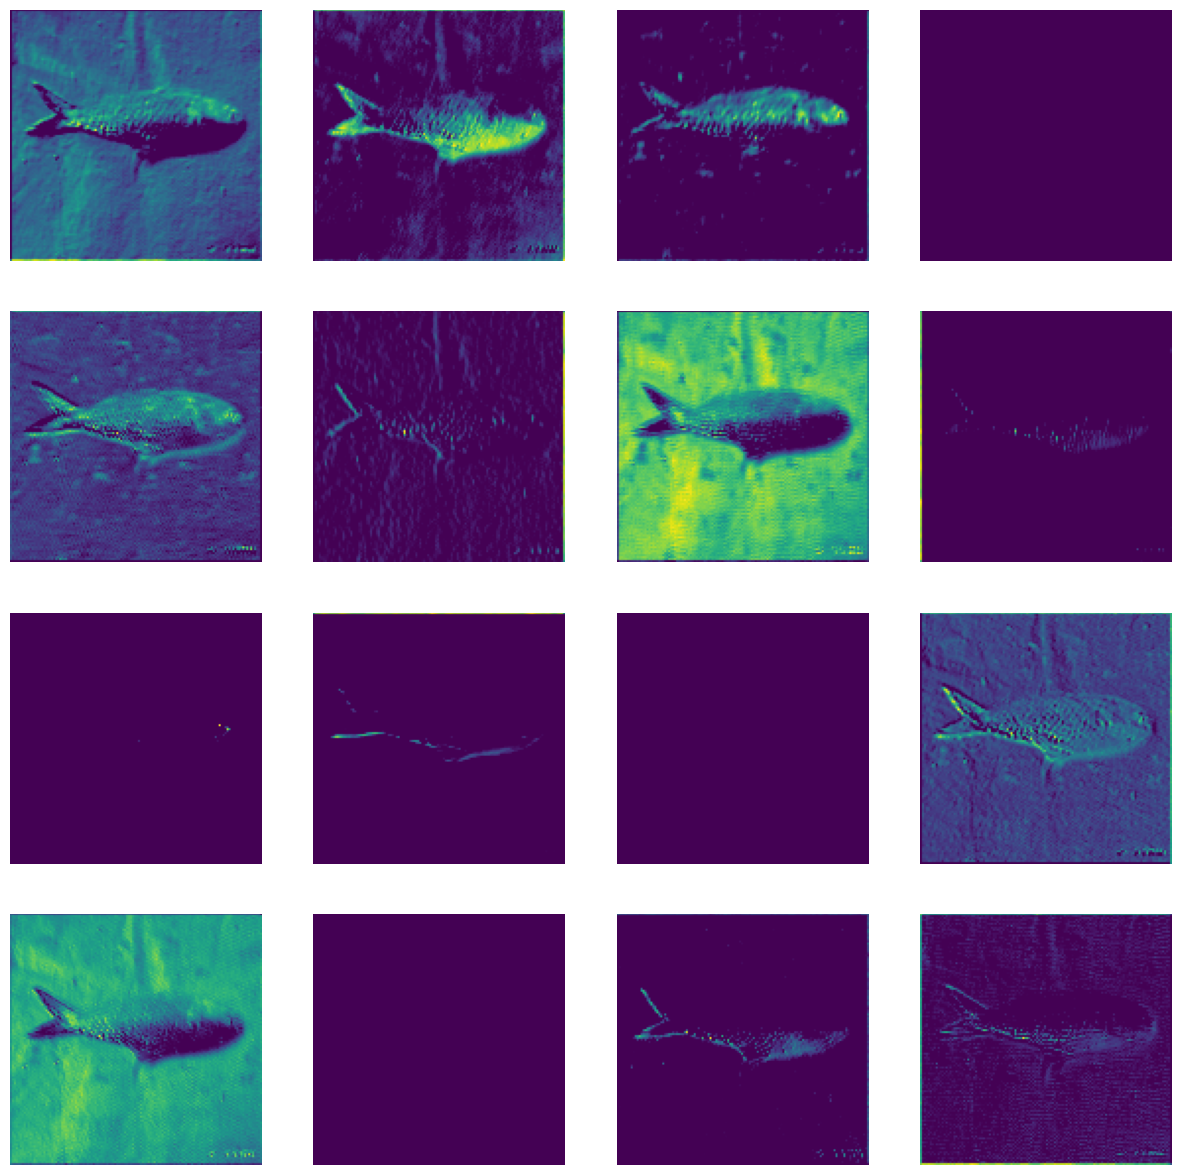

Visualizing feature maps for layer: conv2


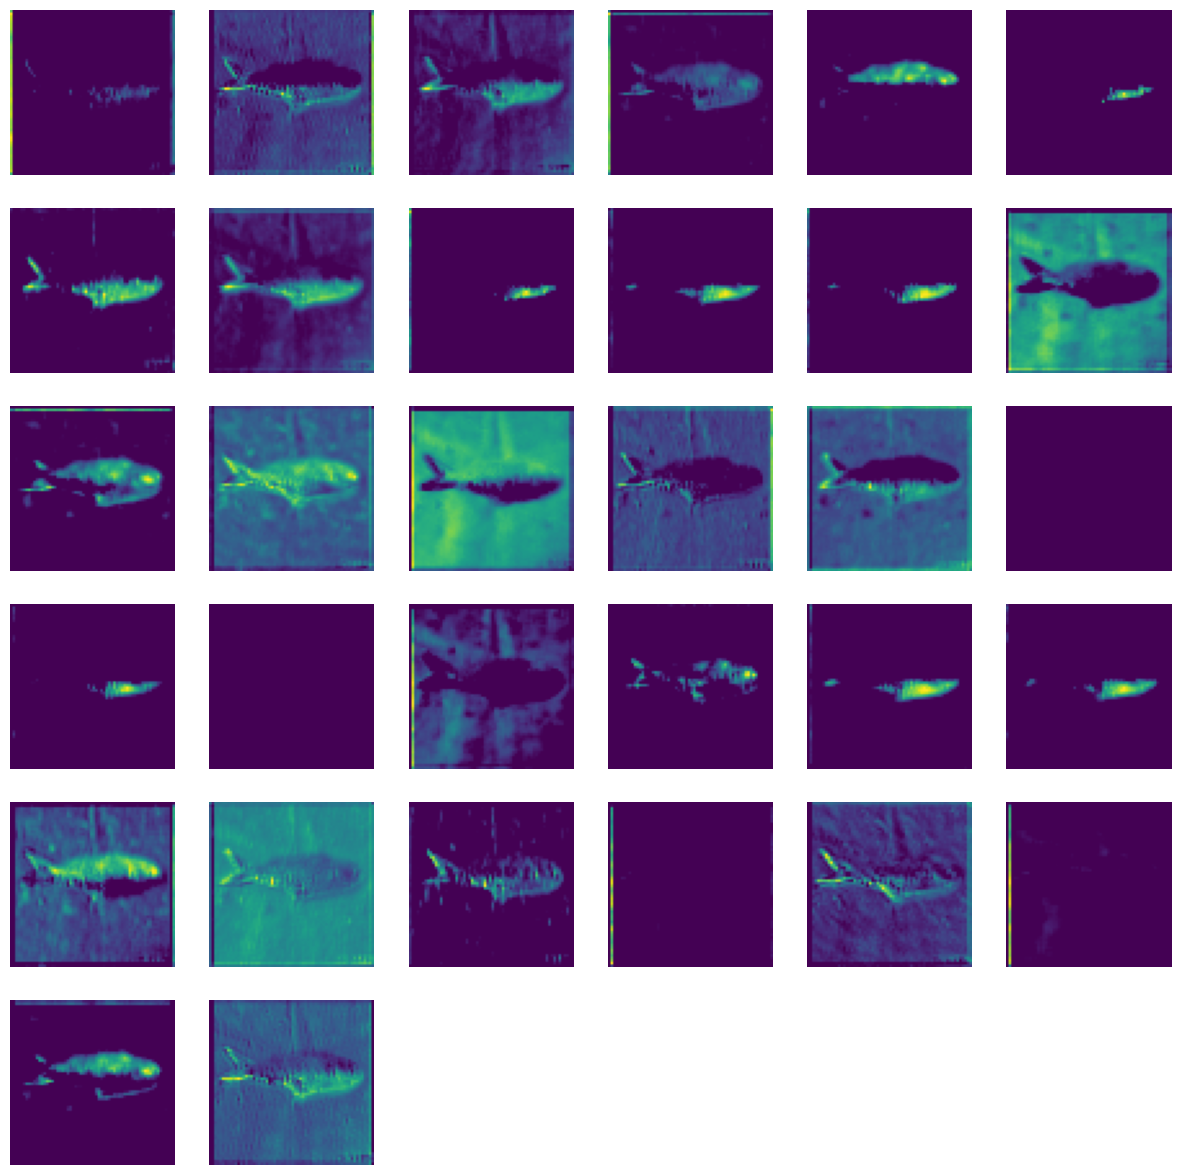

Visualizing feature maps for layer: conv3


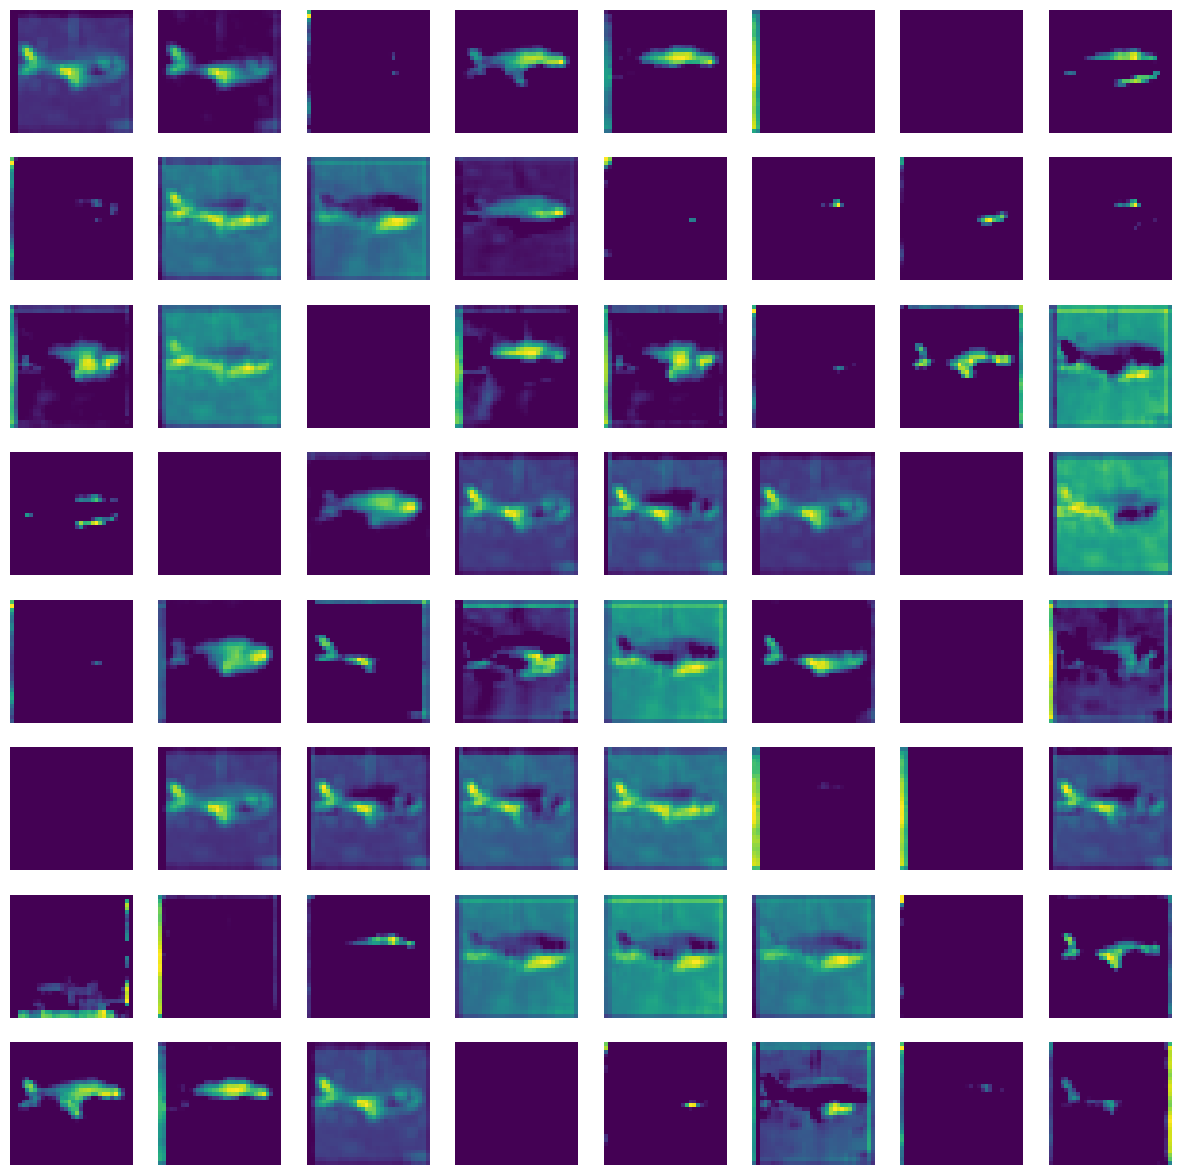

In [83]:
import tensorflow as tf
from tensorflow.keras import layers, models, Model
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Define a custom CNN model
def build_cnn(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same', name='conv1')(inputs)
    x = layers.MaxPooling2D((2, 2), name='pool1')(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='conv2')(x)
    x = layers.MaxPooling2D((2, 2), name='pool2')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv3')(x)
    x = layers.GlobalAveragePooling2D()(x)
    cnn_output = layers.Dense(10, activation='softmax', name='cnn_output')(x)
    return Model(inputs, cnn_output, name='SimpleCNN')

# ResNet50 model (pretrained)
def build_resnet(input_shape):
    base_resnet = tf.keras.applications.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape,
        pooling='avg'
    )
    resnet_output = layers.Dense(10, activation='softmax', name='resnet_output')(base_resnet.output)
    return Model(base_resnet.input, resnet_output, name='ResNet50')

# Ensemble model combining CNN and ResNet
def build_ensemble(cnn_model, resnet_model):
    combined_input = layers.Input(shape=cnn_model.input.shape[1:])
    cnn_out = cnn_model(combined_input)
    resnet_out = resnet_model(combined_input)
    combined_output = layers.Average()([cnn_out, resnet_out])
    return Model(combined_input, combined_output, name='EnsembleModel')

# Visualize feature maps
def visualize_feature_maps(model, image, layer_names):
    feature_map_model = Model(inputs=model.input, outputs=[model.get_layer(name).output for name in layer_names])
    feature_maps = feature_map_model.predict(image)

    for layer_name, feature_map in zip(layer_names, feature_maps):
        print(f"Visualizing feature maps for layer: {layer_name}")
        num_filters = feature_map.shape[-1]
        size = feature_map.shape[1]

        # Determine grid size
        grid_size = int(np.ceil(np.sqrt(num_filters)))
        fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
        axes = axes.flatten()

        for i in range(grid_size * grid_size):
            if i < num_filters:
                axes[i].imshow(feature_map[0, :, :, i], cmap='viridis')
                axes[i].axis('off')
            else:
                axes[i].remove()
        plt.show()

# Dataset loading and scaling (replace with your data)
# Assuming X_train_scaled, X_test_scaled, Y_train, Y_test are already prepared
input_shape = X_train_scaled.shape[1:]  # Infer shape from scaled data

# Build models
cnn_model = build_cnn(input_shape)
resnet_model = build_resnet(input_shape)
ensemble_model = build_ensemble(cnn_model, resnet_model)

# Compile the ensemble model
ensemble_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
ensemble_model.fit(
    X_train_scaled, Y_train,
    validation_data=(X_test_scaled, Y_test),
    epochs=15,
    batch_size=32
)

# Evaluate the model
test_loss, test_accuracy = ensemble_model.evaluate(X_test_scaled, Y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

# Visualize feature maps for the first image in the test set
layer_names = ['conv1', 'conv2', 'conv3']  # Layers to visualize from the CNN
visualize_feature_maps(cnn_model, X_test_scaled[:1], layer_names)


In [85]:
# Evaluate the model
test_loss, test_acc = ensemble_model.evaluate(X_train_scaled, Y_train)
print(f"Test accuracy: {test_acc}")

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7986 - loss: 0.8440
Test accuracy: 0.8002916574478149


In [86]:

# Evaluate the model
test_loss, test_acc = ensemble_model.evaluate(X_test_scaled, Y_test)
print(f"Test accuracy: {test_acc}")


188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7941 - loss: 0.8913
Test accuracy: 0.7948333621025085


In [88]:
ensemble_model.save('ensemble_model.h5')
print("Model loaded successfully!")

Model loaded successfully!


In [89]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import r2_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Assuming your data is ready, e.g., X_test_tensor and Y_test_tensor

# Make predictions
y_pred = ensemble_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert the predictions to class labels


188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step


In [90]:

#**R2 Score** (more useful for regression, but still can be used for classification tasks)
r2 = r2_score(Y_test, y_pred_classes)
print(f"R2 Score: {r2:.4f}")


R2 Score: -0.0454


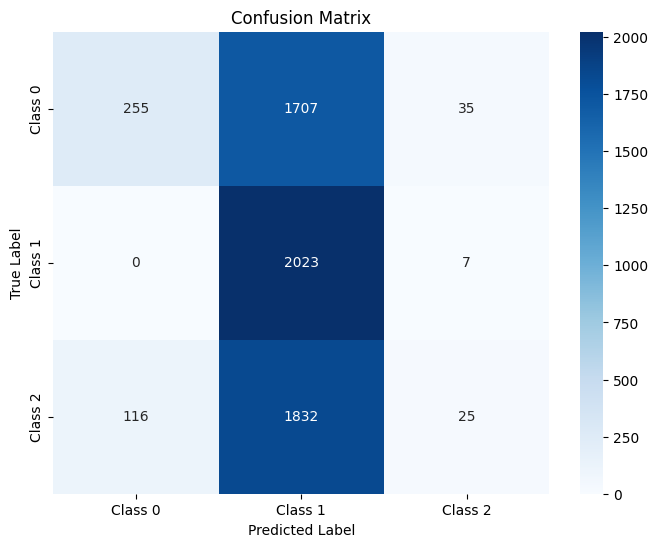

In [91]:
#**Confusion Matrix**
cm = confusion_matrix(Y_test, y_pred_classes)

# Plot Confusion Matrix with Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


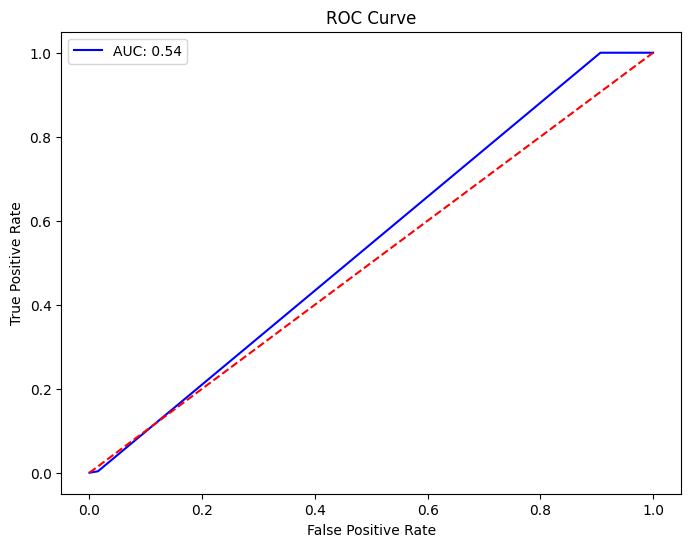

In [93]:

# 7. **ROC Curve and AUC**
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_classes, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'AUC: {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


#K-Fold


### Training Fold 1 ###
Epoch 1/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 80s 39ms/step - accuracy: 0.7025 - loss: 0.8402 - val_accuracy: 0.3748 - val_loss: 1.1898
Epoch 2/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.8136 - loss: 0.6148 - val_accuracy: 0.8017 - val_loss: 0.5592
Epoch 3/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.8685 - loss: 0.4799 - val_accuracy: 0.8490 - val_loss: 0.4817
Epoch 4/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9018 - loss: 0.3849 - val_accuracy: 0.8746 - val_loss: 0.4034
Epoch 5/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.9263 - loss: 0.3287 - val_accuracy: 0.8415 - val_loss: 0.4316
Epoch 6/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.9275 - loss: 0.3160 - val_accuracy: 0.9117 - val_loss: 0.3511
Epoch 7/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.9375 - loss: 0.2796 - val_accuracy: 0.6587 - val_loss: 0.8395
Epoch 8/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy:

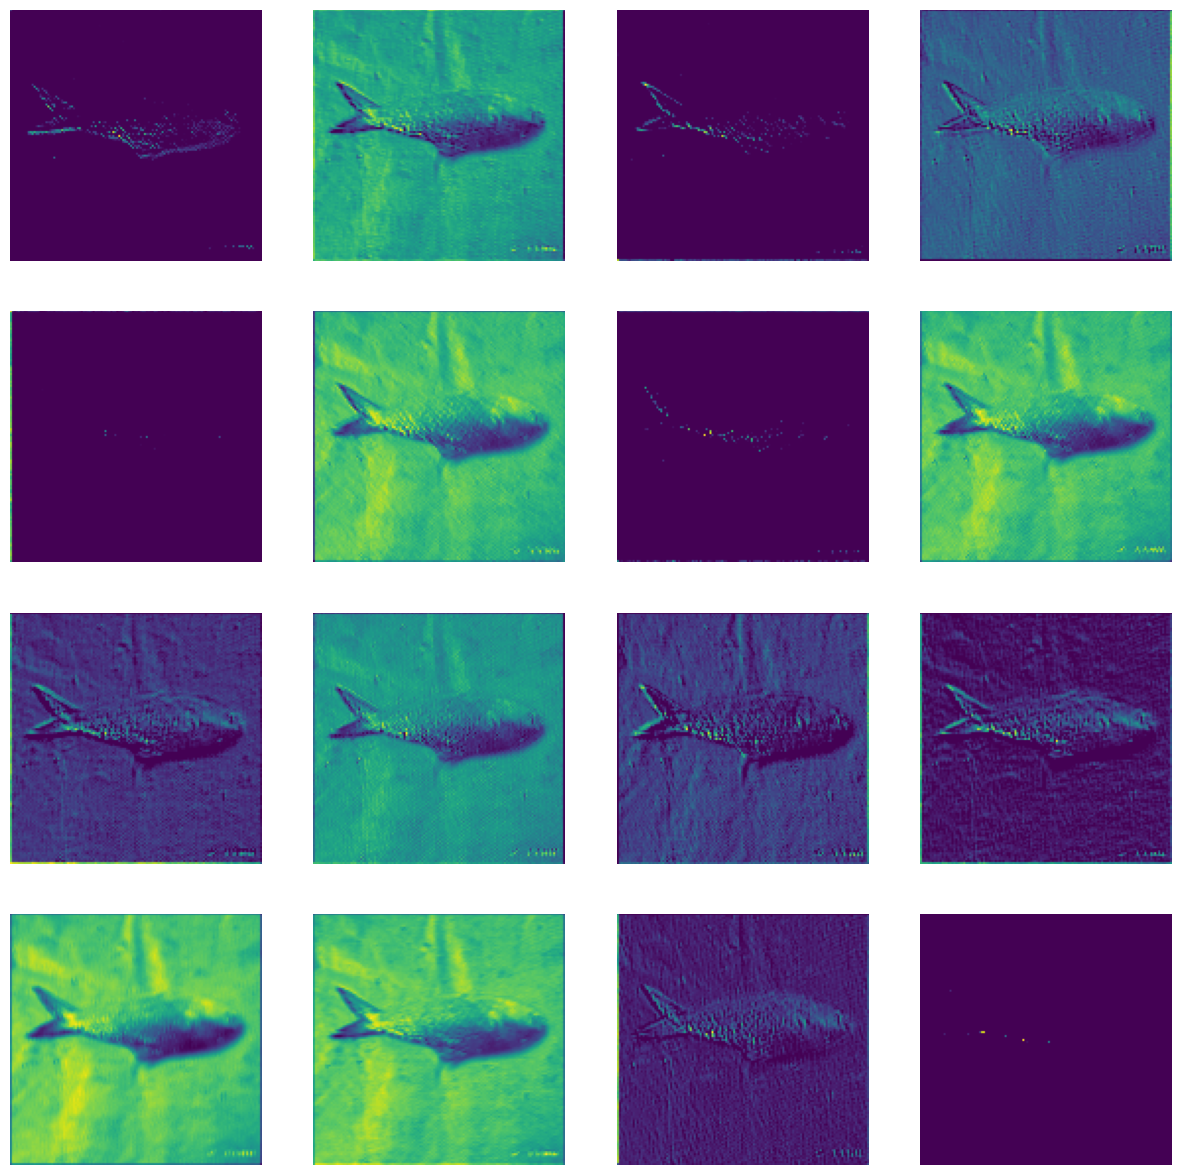

Visualizing feature maps for layer: conv2


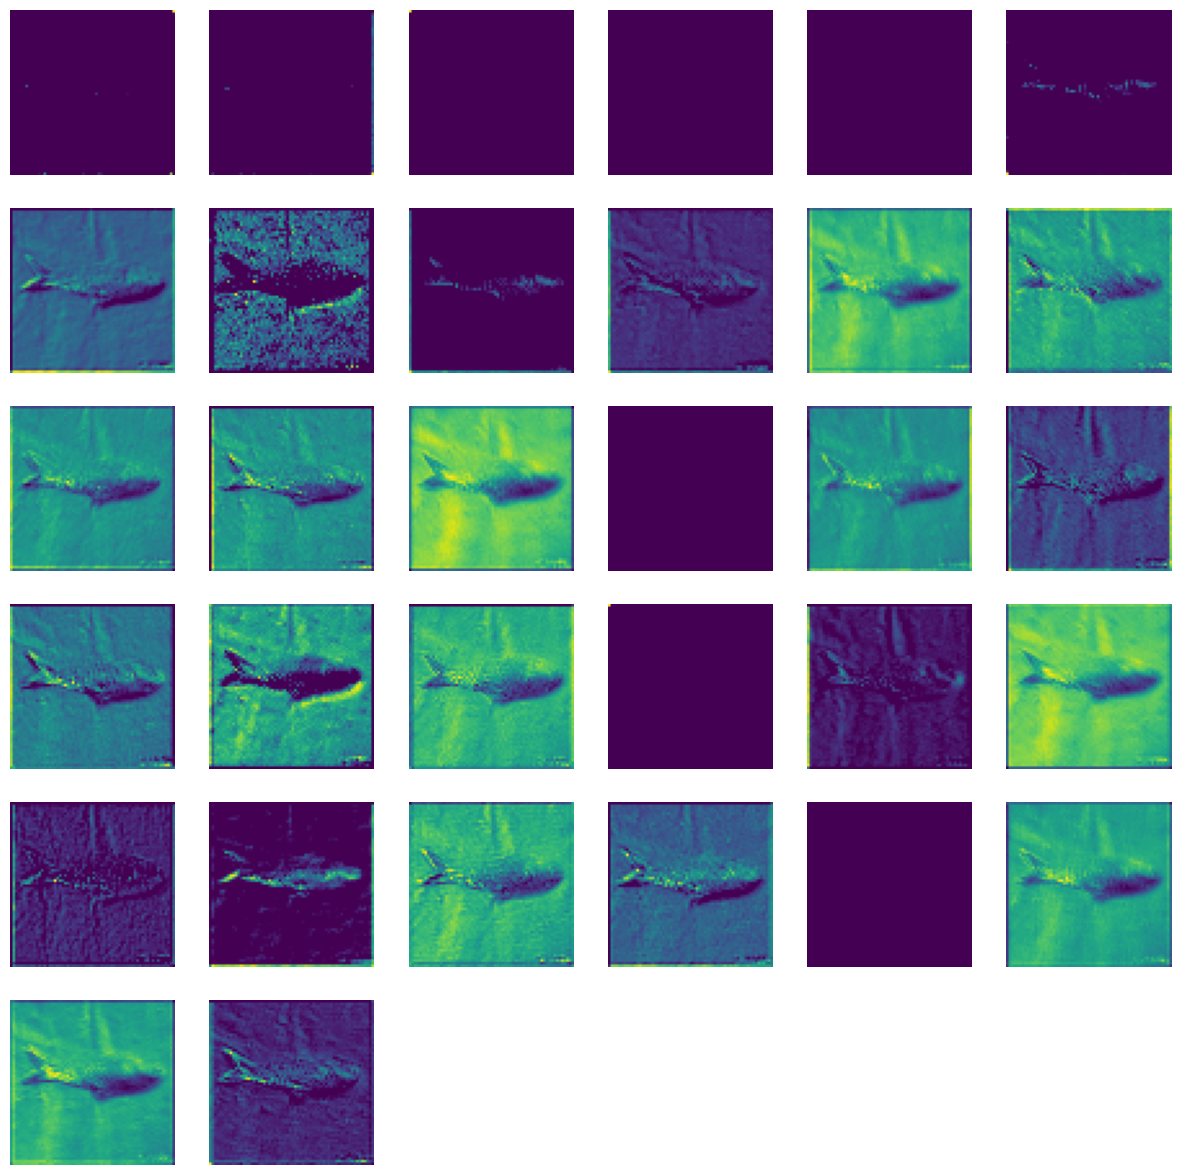

Visualizing feature maps for layer: conv3


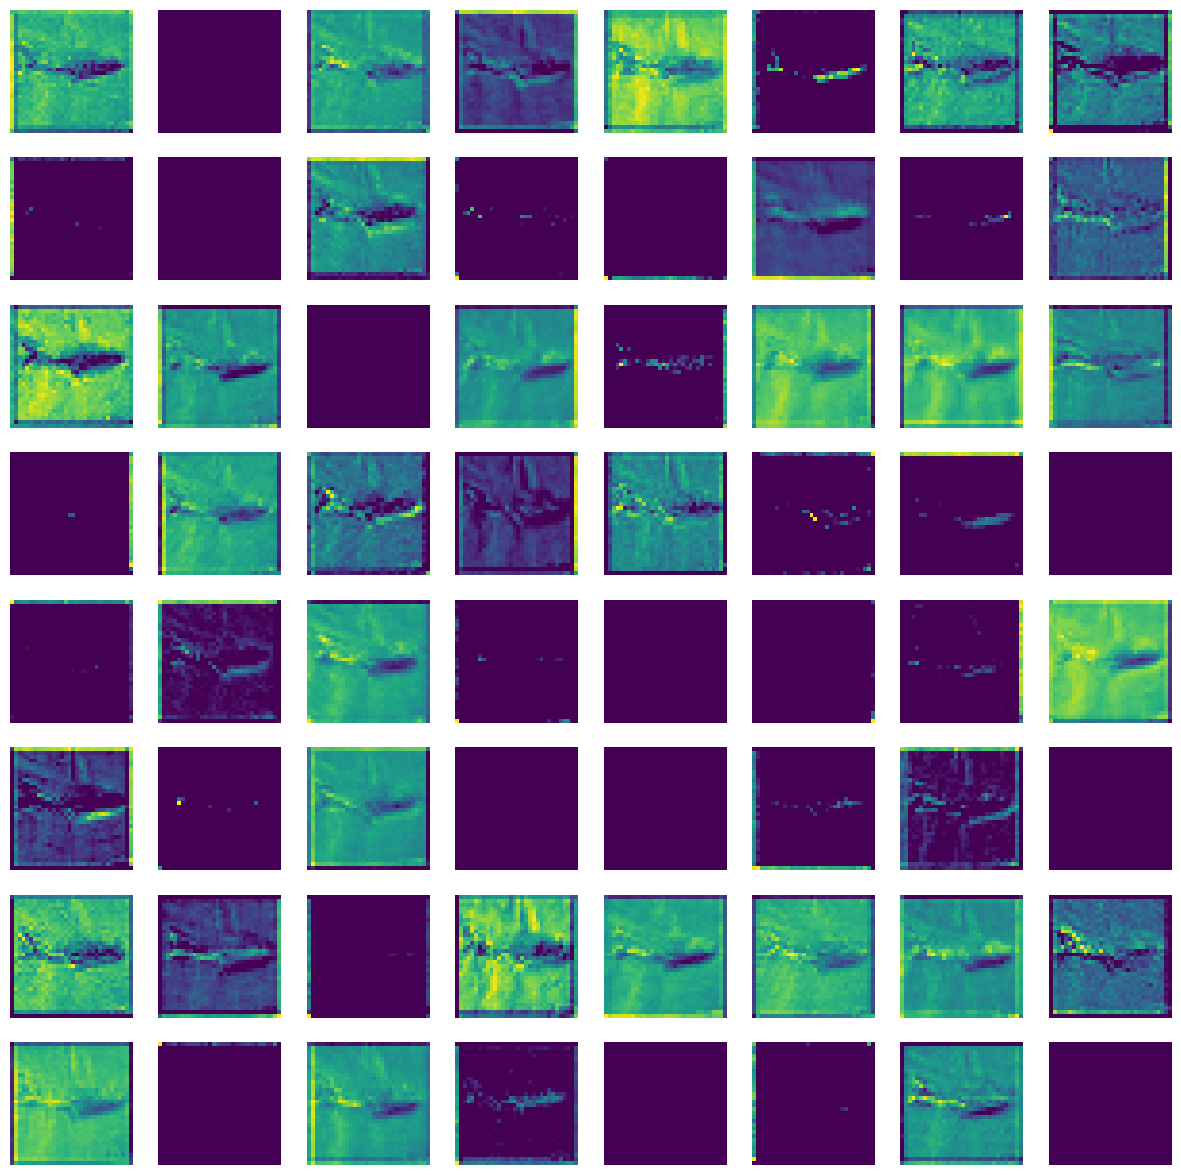

In [92]:
import tensorflow as tf
from tensorflow.keras import layers, models, Model
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

# Define a custom CNN model
def build_cnn(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same', name='conv1')(inputs)
    x = layers.MaxPooling2D((2, 2), name='pool1')(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='conv2')(x)
    x = layers.MaxPooling2D((2, 2), name='pool2')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv3')(x)
    x = layers.GlobalAveragePooling2D()(x)
    cnn_output = layers.Dense(10, activation='softmax', name='cnn_output')(x)
    return Model(inputs, cnn_output, name='SimpleCNN')

# ResNet50 model (pretrained)
def build_resnet(input_shape):
    base_resnet = tf.keras.applications.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape,
        pooling='avg'
    )
    resnet_output = layers.Dense(10, activation='softmax', name='resnet_output')(base_resnet.output)
    return Model(base_resnet.input, resnet_output, name='ResNet50')

# Ensemble model combining CNN and ResNet
def build_ensemble(cnn_model, resnet_model):
    combined_input = layers.Input(shape=cnn_model.input.shape[1:])
    cnn_out = cnn_model(combined_input)
    resnet_out = resnet_model(combined_input)
    combined_output = layers.Average()([cnn_out, resnet_out])
    return Model(combined_input, combined_output, name='EnsembleModel')

# Visualize feature maps
def visualize_feature_maps(model, image, layer_names):
    feature_map_model = Model(inputs=model.input, outputs=[model.get_layer(name).output for name in layer_names])
    feature_maps = feature_map_model.predict(image)

    for layer_name, feature_map in zip(layer_names, feature_maps):
        print(f"Visualizing feature maps for layer: {layer_name}")
        num_filters = feature_map.shape[-1]
        size = feature_map.shape[1]

        # Determine grid size
        grid_size = int(np.ceil(np.sqrt(num_filters)))
        fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
        axes = axes.flatten()

        for i in range(grid_size * grid_size):
            if i < num_filters:
                axes[i].imshow(feature_map[0, :, :, i], cmap='viridis')
                axes[i].axis('off')
            else:
                axes[i].remove()
        plt.show()

# Stratified K-Fold Training
def train_with_stratified_kfold(X, Y, k=5, num_epochs=15, batch_size=32):
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    fold_no = 1
    results = []

    input_shape = X.shape[1:]

    for train_index, val_index in skf.split(X, Y):
        print(f"\n### Training Fold {fold_no} ###")

        # Split data
        X_train, X_val = X[train_index], X[val_index]
        Y_train, Y_val = Y[train_index], Y[val_index]

        # Build models for each fold
        cnn_model = build_cnn(input_shape)
        resnet_model = build_resnet(input_shape)
        ensemble_model = build_ensemble(cnn_model, resnet_model)

        # Compile the model
        ensemble_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        # Train the model
        history = ensemble_model.fit(
            X_train, Y_train,
            validation_data=(X_val, Y_val),
            epochs=num_epochs,
            batch_size=batch_size,
            verbose=1
        )

        # Evaluate the model
        val_loss, val_accuracy = ensemble_model.evaluate(X_val, Y_val)
        print(f"Fold {fold_no} - Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")
        results.append((val_loss, val_accuracy))

        fold_no += 1

    # Print overall results
    avg_loss = np.mean([result[0] for result in results])
    avg_accuracy = np.mean([result[1] for result in results])
    print(f"\nOverall Results - Average Loss: {avg_loss:.4f}, Average Accuracy: {avg_accuracy:.2f}%")

    return results

# Example: Run stratified k-fold with your dataset
# Assuming X_train_scaled and Y_train are already defined
results = train_with_stratified_kfold(X_train_scaled, Y_train, k=5, num_epochs=5, batch_size=32)

# Visualize feature maps for the first test image (Optional)
layer_names = ['conv1', 'conv2', 'conv3']  # Layers to visualize from the CNN
visualize_feature_maps(build_cnn(X_train_scaled.shape[1:]), X_test_scaled[:1], layer_names)


In [94]:
# Evaluate the model
val_loss, val_accuracy = ensemble_model.evaluate(X_val, Y_val)
print(f"Fold {fold_no} - Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")
results.append((val_loss, val_accuracy))

# Predict and calculate additional metrics
Y_val_pred = np.argmax(ensemble_model.predict(X_val), axis=1)
f1 = f1_score(Y_val, Y_val_pred, average='weighted')
f1_scores.append(f1)
print(f"Fold {fold_no} - F1 Score: {f1:.4f}")

# R² Score (Optional for Classification)
r2 = r2_score(Y_val, Y_val_pred)
r2_scores.append(r2)
print(f"Fold {fold_no} - R² Score: {r2:.4f}")

# Confusion Matrix Heatmap
cm = confusion_matrix(Y_val, Y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.title(f"Confusion Matrix for Fold {fold_no}")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


NameError: name 'X_val' is not defined

In [ ]:
ensemble_model.save('ensemble_model_stratified_Kfold.h5')
print("Model loaded successfully!")

####RMSprop+K-fold

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, Model
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom CNN model with modified layers
def build_cnn(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='conv1')(inputs)
    x = layers.MaxPooling2D((2, 2), name='pool1')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2')(x)
    x = layers.MaxPooling2D((2, 2), name='pool2')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='conv3')(x)
    x = layers.GlobalAveragePooling2D()(x)
    cnn_output = layers.Dense(10, activation='softmax', name='cnn_output')(x)
    return Model(inputs, cnn_output, name='ModifiedCNN')

# ResNet50 model with modified output
def build_resnet(input_shape):
    base_resnet = tf.keras.applications.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape,
        pooling='avg'
    )
    x = layers.Dense(512, activation='relu', name='fc1')(base_resnet.output)
    resnet_output = layers.Dense(10, activation='softmax', name='resnet_output')(x)
    return Model(base_resnet.input, resnet_output, name='ModifiedResNet50')

# Ensemble model combining CNN and ResNet
def build_ensemble(cnn_model, resnet_model):
    combined_input = layers.Input(shape=cnn_model.input.shape[1:])
    cnn_out = cnn_model(combined_input)
    resnet_out = resnet_model(combined_input)
    combined_output = layers.Average()([cnn_out, resnet_out])
    return Model(combined_input, combined_output, name='EnsembleModel')

# Visualize feature maps
def visualize_feature_maps(model, image, layer_names):
    feature_map_model = Model(inputs=model.input, outputs=[model.get_layer(name).output for name in layer_names])
    feature_maps = feature_map_model.predict(image)

    for layer_name, feature_map in zip(layer_names, feature_maps):
        print(f"\nVisualizing feature maps for layer: {layer_name}")
        num_filters = feature_map.shape[-1]
        size = feature_map.shape[1]

        # Determine grid size
        grid_size = int(np.ceil(np.sqrt(num_filters)))
        fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
        axes = axes.flatten()

        for i in range(grid_size * grid_size):
            if i < num_filters:
                axes[i].imshow(feature_map[0, :, :, i], cmap='viridis')
                axes[i].axis('off')
            else:
                axes[i].remove()
        plt.tight_layout()
        plt.show()

# K-Fold Cross-Validation
def train_with_kfold(X, Y, k=5, num_epochs=10, batch_size=32):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_no = 1
    results = []

    input_shape = X.shape[1:]

    for train_index, val_index in kf.split(X):
        print(f"\n### Training Fold {fold_no} ###")

        # Split data
        X_train, X_val = X[train_index], X[val_index]
        Y_train, Y_val = Y[train_index], Y[val_index]

        # Build models for each fold
        cnn_model = build_cnn(input_shape)
        resnet_model = build_resnet(input_shape)
        ensemble_model = build_ensemble(cnn_model, resnet_model)

        # Compile the model using RMSprop
        ensemble_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        # Train the model
        history = ensemble_model.fit(
            X_train, Y_train,
            validation_data=(X_val, Y_val),
            epochs=num_epochs,
            batch_size=batch_size,
            verbose=1
        )

        # Evaluate the model
        val_loss, val_accuracy = ensemble_model.evaluate(X_val, Y_val)
        print(f"Fold {fold_no} - Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")
        results.append((val_loss, val_accuracy))

        # Visualize feature maps for the first image
        first_image = X_val[:1]  # Take the first image
        layer_names = ['conv1', 'conv2', 'conv3']  # Convolutional layers to visualize
        visualize_feature_maps(cnn_model, first_image, layer_names)

        # Confusion Matrix Heatmap
        Y_val_pred = np.argmax(ensemble_model.predict(X_val), axis=1)
        cm = confusion_matrix(Y_val, Y_val_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
        plt.title(f"Confusion Matrix for Fold {fold_no}")
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()

        fold_no += 1

    # Print overall results
    avg_loss = np.mean([result[0] for result in results])
    avg_accuracy = np.mean([result[1] for result in results])
    print(f"\nOverall Results:")
    print(f"Average Loss: {avg_loss:.4f}")
    print(f"Average Accuracy: {avg_accuracy:.2f}%")

    return results

# Example: Run K-Fold with your dataset
# Assuming X_train_scaled and Y_train are already defined
results = train_with_kfold(X_train_scaled, Y_train, k=5, num_epochs=10, batch_size=32)


In [ ]:
ensemble_model.save('ensemble_model_Kfold.h5')
print("Model loaded successfully!")